In [3]:
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import numpy as np

# Scipy

Scipy is a library with many numerical algorithm

* Special functions
* Integrals
* Differential equations
* optimisation
* linear algebra

## Special functions

Fonctions not in numpy : Bessel, Airy, error function... 

In [2]:
from scipy.special import erf, jn

## Numerical integration

Many algorithm. The simplest : ``quad``

Example : error function
    $$ \mathrm{erf}(x) = \int_0^x \frac{2}{\sqrt{\pi}} e^{-t^2} dt$$
    
Remarks : 

* Integration to infinity (``np.inf``)
* If you have the function, do not use an array. Quad is smarter than you.
* If you have points, use ``trapz`` or ``simps``

In [ ]:
def ma_fonction(t):
    return 2/np.sqrt(np.pi)*np.exp(-t**2)

In [ ]:
from scipy.integrate import trapz

data_y = [0, 1, 2, 4, 8]
data_x = [0, 2, 3, 4, 5]

plt.plot(data_x, data_y)
plt.fill_between(data_x, data_y, alpha=.5)


trapz(data_y, data_x)

## Ordinary differential equations

## Equations différentielles

The package ``scipy.integrate`` contains functions to solve ODE : 

$$\frac{dy}{dt} = f(t, y)$$
    
with given initial conditions ($y$ is known at time $t_0$). Note that $y$ can be a vector (``np.array``).

We use ``solve_ivp`` (replace ``ode`` or ``odeint``): 

    def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, ...)
    
On can choos the integration metdhod (by default Runge-Kutta order 5(4) with adaptative steps)

The function ``solve_ivp`` returns an object (a dictionnary) with the result (res.y) and information about the convergence of the algorithm.

Example : 
$$\frac{dy}{dt} = -y$$    


### Higher order differential equation

Increase the dimension of $y$ by adding derivative. 

For example : 

$$\frac{d^2y}{dt^2} = \frac{f(y)}{m}$$

became :

$$\frac d{dt} \begin{pmatrix}
y \\ 
y ^\prime
\end{pmatrix} = \begin{pmatrix}
y ^\prime \\
f(y)/m
\end{pmatrix} = F(y, y^\prime)$$



## Optimisation

* Zeros of a function
* Minimum
* least square / fit


Example : 
* first positive solution of $\tan(x)=x$
* First minimum of $sinc(x)$

In [3]:
from scipy.optimize import root_scalar, minimize_scalar

### Fit

$$ y(x) = a e^{(x-x_0)^2/w^2}$$

<ErrorbarContainer object of 3 artists>

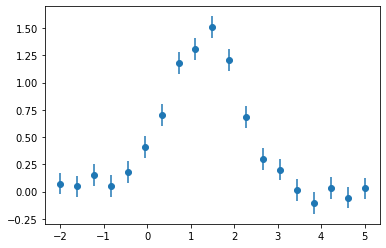

In [9]:
from scipy.optimize import curve_fit

x = np.linspace(-2, 5, 19)
y = 1.45*np.exp(-(x-1.34)**2/1.34)
yn = y + 0.1*np.random.normal(size=len(x))

plt.errorbar(x, yn, yerr=.1, fmt='o')

### FIt of a picture

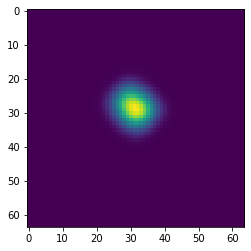

In [5]:
from matplotlib.pyplot import imread

data = imread('data/exemple_gaussienne.png')

fig = plt.figure()
ax = fig.subplots(1, 1)

ax.imshow(data)

In [18]:
ny, nx = data.shape
X,Y = np.meshgrid(range(nx), range(ny))

XY = np.array([X.flatten(), Y.flatten()]).transpose()

def gauss(XY, amplitude, center_x, center_y, diameter):
    x = XY[:,0]
    y = XY[:,1]
    return amplitude*np.exp(-((x-center_x)**2 + (y-center_y)**2)/diameter**2)

p0 = [1, 30, 30, 3]

popt, pcov = curve_fit(gauss, XY, data.flatten(), p0)
popt

array([ 0.83096663, 31.05667531, 28.43598741,  5.46078621])

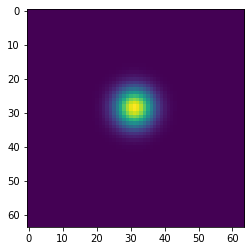

In [17]:
fig = plt.figure()
ax = fig.subplots(1, 1)

data_fit = gauss(XY, *popt)

data_fit = data_fit.reshape((ny, nx))

ax.imshow(data_fit)